In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from l5kit_conflict.analysis.post_process import load_l5kit_potential_conflicts

np.set_printoptions(suppress=True)
plt.style.use("ggplot")

C:\Users\LocalAdmin\Documents\GitHub\lyft_intersection\l5kit\l5kit\l5kit\dataset\select_agents.py:31: UserWarning: Windows detected. BLOSC_NOLOCK has not been set as it causes memory leaks on Windows.However, writing the mask with this config may be inconsistent.
  warnings.warn(


In [2]:
AVHV_potential_conflict_dataset, HVHV_potential_conflict_dataset = load_l5kit_potential_conflicts()

1> Loading pickle files ...
HVHV dataset #samples: 739
AVHV dataset #samples: 678
2> Removing unnecessary conflicts ...
HVHV dataset #samples: 608
AVHV dataset #samples: 508
3> Removing AVHV conflicts with non-continuous AV trajectories ...
HVHV dataset #samples: 608
AVHV dataset #samples: 479
4> Post-processing the complex potential conflicts ...
HVHV dataset #samples: 459
AVHV dataset #samples: 400


In [8]:
import pickle

with open('lyft_avhv_conflict.pkl', 'wb') as file:
    pickle.dump(AVHV_potential_conflict_dataset, file)
with open('lyft_hvhv_conflict.pkl', 'wb') as file:
    pickle.dump(HVHV_potential_conflict_dataset, file)

In [3]:
HVHV_PETs, HVHV_PETs_merge, HVHV_PETs_cross = [], [], []

for conflict in tqdm(HVHV_potential_conflict_dataset):
    HVHV_PETs.append(conflict.PET)
    if conflict.category == "merge":
        HVHV_PETs_merge.append(conflict.PET)
    else:
        HVHV_PETs_cross.append(conflict.PET)
        
##############################################################

AVHV_PETs, AVHV_PETs_merge, AVHV_PETs_cross = [], [], []
HVAV_PETs, HVAV_PETs_merge, HVAV_PETs_cross = [], [], []

for conflict in tqdm(AVHV_potential_conflict_dataset):
        PET = conflict.PET
        if conflict.is_first_AV:
            AVHV_PETs.append(PET) 
            if conflict.category == "merge":
                AVHV_PETs_merge.append(conflict.PET)
            else:
                AVHV_PETs_cross.append(conflict.PET)
        else:
            HVAV_PETs.append(PET)
            if conflict.category == "merge":
                HVAV_PETs_merge.append(conflict.PET)
            else:
                HVAV_PETs_cross.append(conflict.PET)
                
##############################################################

PET_MIN = 0
PET_MAX = 10

# turn to np.array
HVHV_PETs = np.array(HVHV_PETs)
AVHV_PETs = np.array(AVHV_PETs)
HVAV_PETs = np.array(HVAV_PETs)
HVHV_PETs_merge = np.array(HVHV_PETs_merge)
AVHV_PETs_merge = np.array(AVHV_PETs_merge)
HVAV_PETs_merge = np.array(HVAV_PETs_merge)
HVHV_PETs_cross = np.array(HVHV_PETs_cross)
AVHV_PETs_cross = np.array(AVHV_PETs_cross)
HVAV_PETs_cross = np.array(HVAV_PETs_cross)

# filter the values
HVHV_PETs = HVHV_PETs[(HVHV_PETs > PET_MIN) & (HVHV_PETs <= PET_MAX)]
AVHV_PETs = AVHV_PETs[(AVHV_PETs > PET_MIN) & (AVHV_PETs <= PET_MAX)]
HVAV_PETs = HVAV_PETs[(HVAV_PETs > PET_MIN) & (HVAV_PETs <= PET_MAX)]
HVHV_PETs_merge = HVHV_PETs_merge[(HVHV_PETs_merge > PET_MIN) & (HVHV_PETs_merge <= PET_MAX)]
AVHV_PETs_merge = AVHV_PETs_merge[(AVHV_PETs_merge > PET_MIN) & (AVHV_PETs_merge <= PET_MAX)]
HVAV_PETs_merge = HVAV_PETs_merge[(HVAV_PETs_merge > PET_MIN) & (HVAV_PETs_merge <= PET_MAX)]
HVHV_PETs_cross = HVHV_PETs_cross[(HVHV_PETs_cross > PET_MIN) & (HVHV_PETs_cross <= PET_MAX)]
AVHV_PETs_cross = AVHV_PETs_cross[(AVHV_PETs_cross > PET_MIN) & (AVHV_PETs_cross <= PET_MAX)]
HVAV_PETs_cross = HVAV_PETs_cross[(HVAV_PETs_cross > PET_MIN) & (HVAV_PETs_cross <= PET_MAX)]

100%|████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 400889.27it/s]


AttributeError: 'numpy.ndarray' object has no attribute 'head'

PET - all


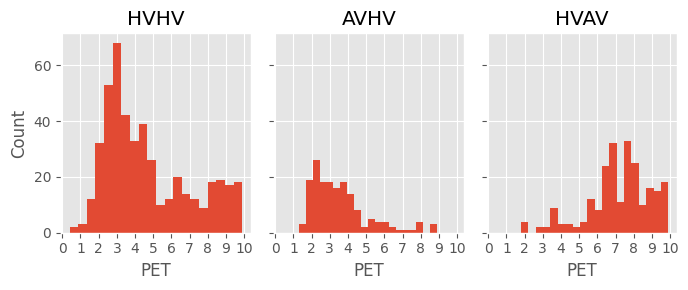

PET - merge


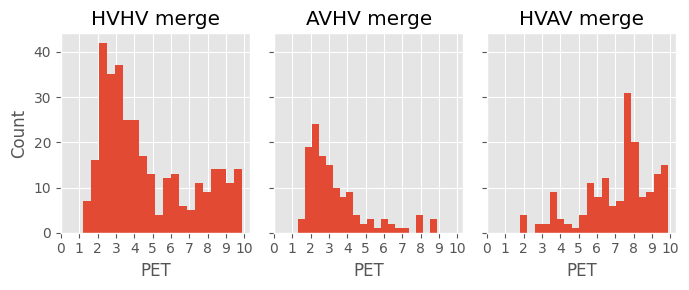

PET - cross


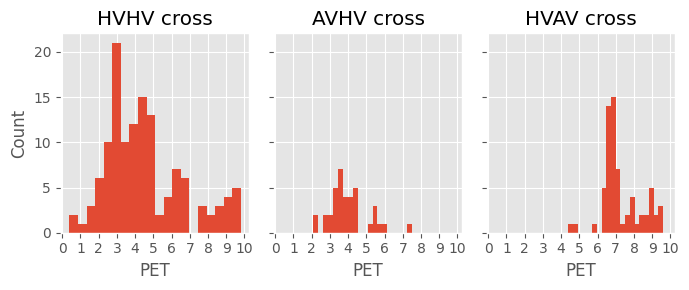

In [8]:
bins = int(PET_MAX * 2)
width = 7
height = 3

print("PET - all")
fig, axs = plt.subplots(1, 3, figsize=(width, height), sharey=True, sharex=True)

axs[0].hist(x=HVHV_PETs, bins=bins,)
axs[1].hist(x=AVHV_PETs, bins=bins,)
axs[2].hist(x=HVAV_PETs, bins=bins,)

axs[0].set_title("HVHV")
axs[0].set_xlabel("PET")
axs[0].set_ylabel("Count")

axs[1].set_title("AVHV")
axs[1].set_xlabel("PET")
# axs[1].set_ylabel("Count")

axs[2].set_title("HVAV")
axs[2].set_xlabel("PET")
# axs[2].set_ylabel("Count")

axs[0].set_xticks(np.arange(PET_MAX+1))

plt.tight_layout()
plt.show()

#######################################################################
print("PET - merge")
fig, axs = plt.subplots(1, 3, figsize=(width, height), sharey=True, sharex=True)

axs[0].hist(x=HVHV_PETs_merge, bins=bins,)
axs[1].hist(x=AVHV_PETs_merge, bins=bins,)
axs[2].hist(x=HVAV_PETs_merge, bins=bins,)

axs[0].set_title("HVHV merge")
axs[0].set_xlabel("PET")
axs[0].set_ylabel("Count")

axs[1].set_title("AVHV merge")
axs[1].set_xlabel("PET")
# axs[1].set_ylabel("Count")

axs[2].set_title("HVAV merge")
axs[2].set_xlabel("PET")
# axs[2].set_ylabel("Count")

axs[0].set_xticks(np.arange(PET_MAX+1))

plt.tight_layout()
plt.show()

#######################################################################
print("PET - cross")
fig, axs = plt.subplots(1, 3, figsize=(width, height), sharey=True, sharex=True)

axs[0].hist(x=HVHV_PETs_cross, bins=bins,)
axs[1].hist(x=AVHV_PETs_cross, bins=bins,)
axs[2].hist(x=HVAV_PETs_cross, bins=bins,)

axs[0].set_title("HVHV cross")
axs[0].set_xlabel("PET")
axs[0].set_ylabel("Count")

axs[1].set_title("AVHV cross")
axs[1].set_xlabel("PET")
# axs[1].set_ylabel("Count")

axs[2].set_title("HVAV cross")
axs[2].set_xlabel("PET")
# axs[2].set_ylabel("Count")

axs[0].set_xticks(np.arange(PET_MAX+1))

plt.tight_layout()
plt.show()

1> Loading pickle files ...
HVHV dataset #samples: 739
AVHV dataset #samples: 678
2> Removing unnecessary conflicts ...
HVHV dataset #samples: 608
AVHV dataset #samples: 508
3> Removing AVHV conflicts with non-continuous AV trajectories ...
HVHV dataset #samples: 608
AVHV dataset #samples: 479
4> Post-processing the complex potential conflicts ...
HVHV dataset #samples: 608
AVHV dataset #samples: 479


100%|███████████████████████████████████████████████████| 479/479 [00:00<00:00, 480639.14it/s]

PET - all


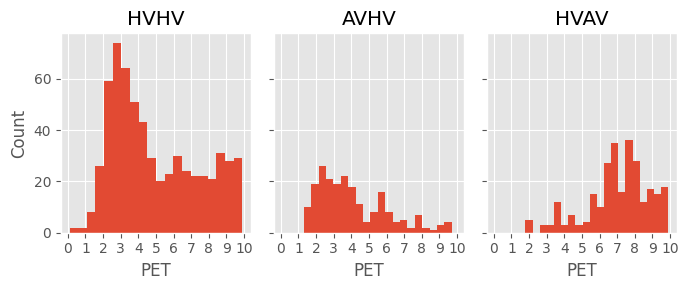

PET - merge


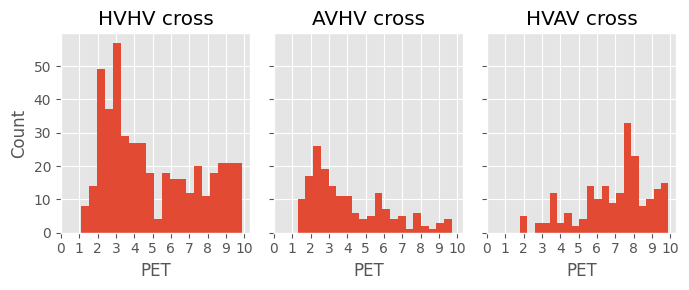

PET - cross


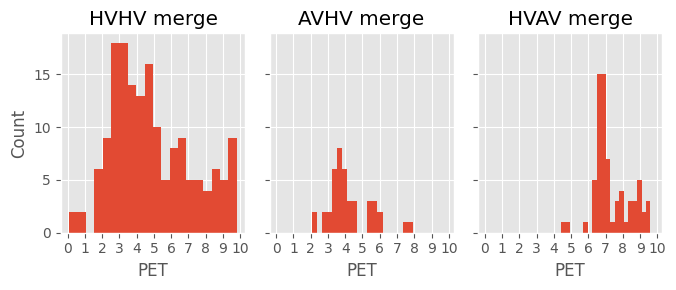

In [10]:
AVHV_potential_conflict_dataset, HVHV_potential_conflict_dataset = load_l5kit_potential_conflicts(is_postprocess=False)

HVHV_PETs, HVHV_PETs_merge, HVHV_PETs_cross = [], [], []

for conflict in tqdm(HVHV_potential_conflict_dataset):
    HVHV_PETs.append(conflict.PET)
    if conflict.category == "merge":
        HVHV_PETs_merge.append(conflict.PET)
    else:
        HVHV_PETs_cross.append(conflict.PET)
        
##############################################################

AVHV_PETs, AVHV_PETs_merge, AVHV_PETs_cross = [], [], []
HVAV_PETs, HVAV_PETs_merge, HVAV_PETs_cross = [], [], []

for conflict in tqdm(AVHV_potential_conflict_dataset):
        PET = conflict.PET
        if conflict.is_first_AV:
            AVHV_PETs.append(PET) 
            if conflict.category == "merge":
                AVHV_PETs_merge.append(conflict.PET)
            else:
                AVHV_PETs_cross.append(conflict.PET)
        else:
            HVAV_PETs.append(PET)
            if conflict.category == "merge":
                HVAV_PETs_merge.append(conflict.PET)
            else:
                HVAV_PETs_cross.append(conflict.PET)
                
##############################################################

PET_MIN = 0
PET_MAX = 10

# turn to np.array
HVHV_PETs = np.array(HVHV_PETs)
AVHV_PETs = np.array(AVHV_PETs)
HVAV_PETs = np.array(HVAV_PETs)
HVHV_PETs_merge = np.array(HVHV_PETs_merge)
AVHV_PETs_merge = np.array(AVHV_PETs_merge)
HVAV_PETs_merge = np.array(HVAV_PETs_merge)
HVHV_PETs_cross = np.array(HVHV_PETs_cross)
AVHV_PETs_cross = np.array(AVHV_PETs_cross)
HVAV_PETs_cross = np.array(HVAV_PETs_cross)

# filter the values
HVHV_PETs = HVHV_PETs[(HVHV_PETs > PET_MIN) & (HVHV_PETs <= PET_MAX)]
AVHV_PETs = AVHV_PETs[(AVHV_PETs > PET_MIN) & (AVHV_PETs <= PET_MAX)]
HVAV_PETs = HVAV_PETs[(HVAV_PETs > PET_MIN) & (HVAV_PETs <= PET_MAX)]
HVHV_PETs_merge = HVHV_PETs_merge[(HVHV_PETs_merge > PET_MIN) & (HVHV_PETs_merge <= PET_MAX)]
AVHV_PETs_merge = AVHV_PETs_merge[(AVHV_PETs_merge > PET_MIN) & (AVHV_PETs_merge <= PET_MAX)]
HVAV_PETs_merge = HVAV_PETs_merge[(HVAV_PETs_merge > PET_MIN) & (HVAV_PETs_merge <= PET_MAX)]
HVHV_PETs_cross = HVHV_PETs_cross[(HVHV_PETs_cross > PET_MIN) & (HVHV_PETs_cross <= PET_MAX)]
AVHV_PETs_cross = AVHV_PETs_cross[(AVHV_PETs_cross > PET_MIN) & (AVHV_PETs_cross <= PET_MAX)]
HVAV_PETs_cross = HVAV_PETs_cross[(HVAV_PETs_cross > PET_MIN) & (HVAV_PETs_cross <= PET_MAX)]

bins = int(PET_MAX * 2)
width = 7
height = 3

print("PET - all")
fig, axs = plt.subplots(1, 3, figsize=(width, height), sharey=True, sharex=True)

axs[0].hist(x=HVHV_PETs, bins=bins,)
axs[1].hist(x=AVHV_PETs, bins=bins,)
axs[2].hist(x=HVAV_PETs, bins=bins,)

axs[0].set_title("HVHV")
axs[0].set_xlabel("PET")
axs[0].set_ylabel("Count")

axs[1].set_title("AVHV")
axs[1].set_xlabel("PET")
# axs[1].set_ylabel("Count")

axs[2].set_title("HVAV")
axs[2].set_xlabel("PET")
# axs[2].set_ylabel("Count")

axs[0].set_xticks(np.arange(PET_MAX+1))

plt.tight_layout()
plt.show()

#######################################################################
print("PET - merge")
fig, axs = plt.subplots(1, 3, figsize=(width, height), sharey=True, sharex=True)

axs[0].hist(x=HVHV_PETs_merge, bins=bins,)
axs[1].hist(x=AVHV_PETs_merge, bins=bins,)
axs[2].hist(x=HVAV_PETs_merge, bins=bins,)

axs[0].set_title("HVHV cross")
axs[0].set_xlabel("PET")
axs[0].set_ylabel("Count")

axs[1].set_title("AVHV cross")
axs[1].set_xlabel("PET")
# axs[1].set_ylabel("Count")

axs[2].set_title("HVAV cross")
axs[2].set_xlabel("PET")
# axs[2].set_ylabel("Count")

axs[0].set_xticks(np.arange(PET_MAX+1))

plt.tight_layout()
plt.show()

#######################################################################
print("PET - cross")
fig, axs = plt.subplots(1, 3, figsize=(width, height), sharey=True, sharex=True)

axs[0].hist(x=HVHV_PETs_cross, bins=bins,)
axs[1].hist(x=AVHV_PETs_cross, bins=bins,)
axs[2].hist(x=HVAV_PETs_cross, bins=bins,)

axs[0].set_title("HVHV merge")
axs[0].set_xlabel("PET")
axs[0].set_ylabel("Count")

axs[1].set_title("AVHV merge")
axs[1].set_xlabel("PET")
# axs[1].set_ylabel("Count")

axs[2].set_title("HVAV merge")
axs[2].set_xlabel("PET")
# axs[2].set_ylabel("Count")

axs[0].set_xticks(np.arange(PET_MAX+1))

plt.tight_layout()
plt.show()